### Import and Format MNIST Dataset

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from PIL import Image

In [4]:
import matplotlib.gridspec as gridspec

In [5]:
from tensorflow.keras.datasets.mnist import load_data

In [6]:
# Load data
(x_train, y_train), (x_test, y_test) = load_data()

In [7]:
# Reshape
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)

In [8]:
# Normalize data
x_train = x_train/255
x_test  = x_test/255

### Train Neural Network

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [15]:
nn_model = Sequential()

In [16]:
nn_model.add(Dense(16, input_shape=x_train[0].shape, activation='relu'))
nn_model.add(Dense(16,  activation='relu'))
nn_model.add(Flatten())
nn_model.add(Dense(10,  activation='softmax'))

In [17]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 28, 28, 16)        32        
_________________________________________________________________
dense_1 (Dense)              (None, 28, 28, 16)        272       
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                125450    
Total params: 125,754
Trainable params: 125,754
Non-trainable params: 0
_________________________________________________________________


In [18]:
nn_model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

nn_model.fit(x=x_train,y=y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 18s 295us/sample - loss: 0.3472 - accuracy: 0.9010
Epoch 2/10
60000/60000 [==============================] - 17s 283us/sample - loss: 0.2844 - accuracy: 0.9195
Epoch 3/10
60000/60000 [==============================] - 18s 302us/sample - loss: 0.2668 - accuracy: 0.9238
Epoch 4/10
60000/60000 [==============================] - 17s 282us/sample - loss: 0.2476 - accuracy: 0.9297
Epoch 5/10
60000/60000 [==============================] - 17s 282us/sample - loss: 0.2288 - accuracy: 0.9352
Epoch 6/10
60000/60000 [==============================] - 20s 341us/sample - loss: 0.2128 - accuracy: 0.9401
Epoch 7/10
60000/60000 [==============================] - 18s 292us/sample - loss: 0.2013 - accuracy: 0.9419
Epoch 8/10
60000/60000 [==============================] - 17s 281us/sample - loss: 0.1924 - accuracy: 0.9452
Epoch 9/10
60000/60000 [==============================] - 19s 317us/sample - loss: 0.1865 - accuracy: 0.9

### Train Convolutional Neural Network

In [19]:
cnn_model = Sequential()

In [20]:
cnn_model.add(Conv2D(28, kernel_size=(3,3), input_shape=x_train[0].shape))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(10,activation='softmax'))

In [21]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               605824    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
________________________________________________

In [22]:
cnn_model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

cnn_model.fit(x=x_train,y=y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 29s 485us/sample - loss: 0.2029 - accuracy: 0.9392
Epoch 2/10
60000/60000 [==============================] - 29s 479us/sample - loss: 0.0815 - accuracy: 0.9757
Epoch 3/10
60000/60000 [==============================] - 30s 507us/sample - loss: 0.0570 - accuracy: 0.9820
Epoch 4/10
60000/60000 [==============================] - 29s 489us/sample - loss: 0.0432 - accuracy: 0.9856
Epoch 5/10
60000/60000 [==============================] - 30s 501us/sample - loss: 0.0357 - accuracy: 0.9882
Epoch 6/10
60000/60000 [==============================] - 29s 487us/sample - loss: 0.0302 - accuracy: 0.9901
Epoch 7/10
60000/60000 [==============================] - 31s 517us/sample - loss: 0.0244 - accuracy: 0.9915
Epoch 8/10
60000/60000 [==============================] - 30s 498us/sample - loss: 0.0223 - accuracy: 0.9925
Epoch 9/10
60000/60000 [==============================] - 29s 482us/sample - loss: 0.0201 - accuracy: 0.9

### Train K-Nearest Neighbors

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [12]:
knn_model.fit(x_train.reshape(len(x_train), 784), y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Evaluate the Models on the Training Set

In [25]:
print('NN Model Accuracy: ' , nn_model.evaluate(x_test, y_test, verbose=False)[1])

NN Model Accuracy:  0.9313


In [27]:
print('CNN Model Accuracy: ', cnn_model.evaluate(x_test, y_test, verbose=False)[1])

CNN Model Accuracy:  0.9834


In [28]:
print('KNN Model Accuracy: ', knn_model.score(x_test[:1000].reshape(len(x_test[:1000]), 784), y_test[:1000]))

KNN Model Accuracy:  0.961


### Visualize Predictions

In [34]:
(np.invert(Image.open('Images/Zero/zero_30.png').convert('L')))/255

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [41]:
img = (np.invert(Image.open('Images/Zero/zero_24.png').convert('L')))/255

In [36]:
nn_model.predict(img.reshape(1, 28, 28, 1))[0]

array([3.2172991e-06, 9.8597205e-01, 2.6094580e-05, 3.0527110e-06,
       2.9433591e-05, 5.9173102e-03, 1.7792969e-07, 8.0483081e-03,
       1.8578214e-11, 3.4319817e-07], dtype=float32)

In [71]:
nn_pred = nn_model.predict(img.reshape(1, 28, 28, 1))[0]

nn_pred

array([4.1897548e-04, 2.6802529e-02, 1.4600402e-04, 5.4710639e-05,
       3.2298369e-05, 1.2503115e-04, 6.0488869e-10, 9.7234243e-01,
       4.2185229e-09, 7.7957826e-05], dtype=float32)

In [70]:
cnn_pred = cnn_model.predict(img.reshape(1, 28, 28, 1))[0]

cnn_pred

array([3.6273857e-03, 2.2092869e-05, 1.3225813e-05, 1.5512634e-06,
       9.2661270e-07, 1.1433615e-05, 3.2657990e-09, 9.1845983e-01,
       3.5860059e-05, 7.7827558e-02], dtype=float32)

In [106]:
nbr_index = knn_model.kneighbors(img.reshape(1, 784), n_neighbors=5, return_distance=False)[0]
nbr_label = y_train[nbr_index]
knn_pred = np.bincount(nbr_label, minlength=10)/len(nbr_label)

knn_pred

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

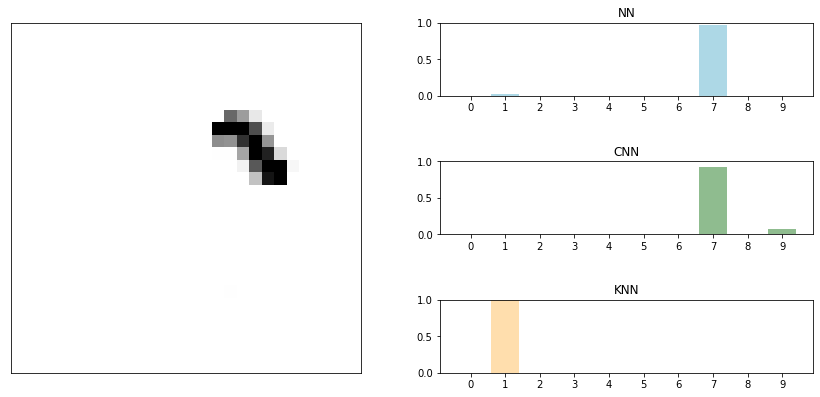

In [159]:
fig = plt.figure()

# Plot Image
plt.subplot2grid((3,2), (0,0), rowspan=3)
plt.imshow(img.reshape(28, 28), cmap='Greys')
plt.xticks([])
plt.yticks([])

# Plot NN Prediction
plt.subplot2grid((3,2), (0, 1))
plt.bar(list(range(len(nn_pred))), nn_pred, color='lightblue')
plt.bar([2], np.array(nn_pred[2])[nn_pred.argmax() == 2], color='steelblue')
plt.xticks(np.arange(0, 10))
plt.ylim([0, 1])
plt.title('NN')
plt.yticks([0, .5, 1])

# Plot CNN Prediction
plt.subplot2grid((3,2), (1, 1))
plt.bar(list(range(len(cnn_pred))), cnn_pred, color='darkseagreen')
plt.bar([2], np.array(cnn_pred[2])[cnn_pred.argmax() == 2], color='seagreen')
plt.xticks(np.arange(0, 10))
plt.ylim([0, 1])
plt.title('CNN')
plt.yticks([0, .5, 1])

# Plot KNN Prediction
plt.subplot2grid((3,2), (2, 1))
plt.bar(list(range(len(knn_pred))), knn_pred, color='navajowhite')
plt.bar([2], np.array(knn_pred[2])[knn_pred.argmax() == 2], color='orangered')
plt.xticks(np.arange(0, 10))
plt.ylim([0, 1])
plt.title('KNN')
plt.yticks([0, .5, 1])

fig.tight_layout()
fig.set_size_inches(w=12,h=6)

([<matplotlib.axis.YTick at 0x2a8c7d3dc48>,
 <a list of 3 Text yticklabel objects>)

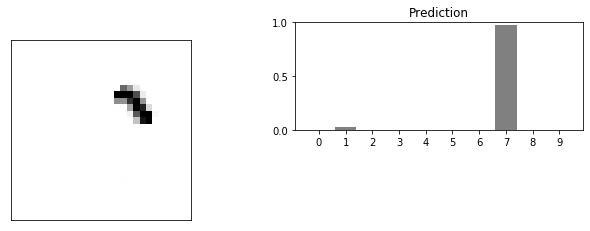

In [43]:
# definitions for the axes
#img = four

img_l = 0
img_b = 0
img_w = .5
img_h = .5

buff_w = .02
bar_l = img_l + img_w + buff_w
bar_b = .25
bar_w = .4
bar_h = .3

img_ax = [img_l, img_b, img_w, img_h]
bar_ax = [bar_l, bar_b, bar_w, bar_h]

plt.figure(figsize=(10, 5))

plt.axes(img_ax)
plt.imshow(img.reshape(28, 28), cmap='Greys')
plt.xticks([])
plt.yticks([])

plt.axes(bar_ax)
plt.bar(list(range(len(nn_pred))), nn_pred, color='grey')
plt.bar([2], np.array(nn_pred[2])[nn_pred.argmax() == 2], color='mediumseagreen')
plt.xticks(np.arange(0, 10))
plt.ylim([0, 1])
plt.title('Prediction')
plt.yticks([0, .5, 1])